<h1>Prediction of Dental Caries Using Machine Learning in Personalized Medecine_LSTM</h1>

<h2>Importing Package</h2>

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


<h2>Fetch Our Data</h2>

In [3]:
df = pd.read_excel('Oral_health_care_dataset.xlsx').copy()
df.head(10)

,act_caries_p,Sido_No,Region_No,Gender,prev_caries_p,X1,X2,X3,X4_1,X4_2,...,X14_6,X14_7,X14_8,X14_9,x15_1,X16,act_caries_p.1,Calculus,Bleeding,Fluorosis
0,0,14,1,2,1,2,1,2,1,0,...,0,0,0,0,1,3,0,0,0,0
1,0,12,1,2,1,3,1,1,1,0,...,0,0,0,0,3,3,0,0,0,0
2,1,11,1,1,0,4,1,2,0,0,...,0,1,0,0,2,2,1,0,0,0
3,0,25,2,2,1,4,1,2,1,0,...,0,1,0,0,2,1,0,0,0,0
4,0,26,2,1,1,3,1,2,1,0,...,0,1,0,0,1,3,0,0,0,0
5,1,22,2,1,1,3,1,2,1,0,...,0,0,1,0,1,7,1,0,0,1
6,0,10,1,2,1,3,1,2,0,0,...,0,0,1,0,2,6,0,0,0,0
7,1,20,2,1,1,3,1,2,0,0,...,0,0,0,0,2,2,0,0,0,1
8,0,10,1,2,0,4,1,1,1,0,...,0,0,1,0,2,1,0,1,0,0
9,0,26,2,1,1,4,1,2,0,0,...,0,1,1,0,2,6,0,0,0,1


In [4]:
df['act_caries_p'].value_counts()

0    20593
1     1695
Name: act_caries_p, dtype: int64

#begin modification

In [5]:
import imblearn
print(imblearn.__version__)

0.8.0


In [6]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
# transform the dataset

df_new = df
df_new.shape
df_cut_cor=df_new.drop('X3',axis=1)
df_cut_cor=df_cut_cor.drop('X4_3',axis=1)
df_cut_cor=df_cut_cor.drop('X4_9',axis=1)
df_cut_cor=df_cut_cor.drop('X5_1',axis=1)
df_cut_cor=df_cut_cor.drop('X5_2',axis=1)

df_cut_cor=df_cut_cor.drop('X5_3',axis=1)
df_cut_cor=df_cut_cor.drop('X5_4',axis=1)
df_cut_cor=df_cut_cor.drop('X6',axis=1)
df_cut_cor=df_cut_cor.drop('X7',axis=1)

df_cut_cor=df_cut_cor.drop('X13',axis=1)
df_cut_cor=df_cut_cor.drop('X14_3',axis=1)
df_cut_cor=df_cut_cor.drop('X14_4',axis=1)
df_cut_cor=df_cut_cor.drop('X14_5',axis=1)

df_cut_cor=df_cut_cor.drop('X14_6',axis=1)
df_cut_cor=df_cut_cor.drop('X16',axis=1)
df_cut_cor=df_cut_cor.drop('act_caries_p',axis=1)
df_cut_cor=df_cut_cor.drop('Region_No',axis=1)
df_scaled = df_cut_cor.copy()

Y = df_new[['act_caries_p']].values
X = df_scaled.iloc[:,1:]

over = SMOTE(sampling_strategy=0.7)
#under = RandomUnderSampler(sampling_strategy=0.5)

#steps = [('o', over), ('u', under)]
#pipeline = Pipeline(steps=steps)

X, Y = over.fit_resample(X, Y)



In [7]:
from collections import Counter

# summarize the new class distribution
counter = Counter(Y)
print(counter)

Counter({0: 20593, 1: 14415})


#End Modification

<h2>Prepare Data for Modeling<h2>

<h2>Scale the dataset</h2>

In [8]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler
# Define the scaler 
scaler = StandardScaler().fit(X)
# Scale the train set
X = scaler.transform(X)
# Define the scaler 
#scaler = StandardScaler().fit(X_train)

<h2>Buil and compile Fit Model</h2>

In [10]:
from sklearn.model_selection import train_test_split
# importing library for LSTM layers
from tensorflow.keras.layers import LSTM
import tensorflow as tf
import numpy as np
opt = tf.keras.optimizers.Adam(lr=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-7,amsgrad=False)
#X = df.iloc[:,1:]
#Y = df[['act_caries_p']].values

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.20, random_state = 42)

#convert the data to numpy arrays
X_train = np.array(X_train)
x_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 91, return_sequences = True, input_shape = (x_train.shape[1], 1), activation='relu'))
regressor.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 42, return_sequences = True, activation='relu'))
regressor.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 15, return_sequences = True, activation='relu'))
regressor.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 9, activation='relu'))
regressor.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
#regressor.add(LSTM(units = 7, activation='relu'))
#regressor.add(Dropout(0.2))
# Adding the output layer
regressor.add(Dense(units = 1,activation='sigmoid'))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])

# Fitting the RNN to the Training set
#regressor.fit(x_train, y_train, epochs = 200,batch_size=1000 ,validation_split=0.2)

es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=50,
                                   restore_best_weights=True)

# now we just update our model fit call
history = regressor.fit(x_train,
                    y_train,
                    callbacks=[es],
                    epochs=100, # you can set this to a big number!
                    batch_size=480,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)


Epoch 1/100
47/47 [==============================] - 9s 130ms/step - loss: 0.6531 - accuracy: 0.5847 - val_loss: 0.6049 - val_accuracy: 0.5793
Epoch 2/100
47/47 [==============================] - 6s 122ms/step - loss: 0.6129 - accuracy: 0.6447 - val_loss: 0.5961 - val_accuracy: 0.6930
Epoch 3/100
47/47 [==============================] - 6s 122ms/step - loss: 0.5965 - accuracy: 0.6850 - val_loss: 0.5761 - val_accuracy: 0.7047
Epoch 4/100
47/47 [==============================] - 6s 122ms/step - loss: 0.5901 - accuracy: 0.6898 - val_loss: 0.5651 - val_accuracy: 0.7162
Epoch 5/100
47/47 [==============================] - 6s 122ms/step - loss: 0.5849 - accuracy: 0.6956 - val_loss: 0.5596 - val_accuracy: 0.7237
Epoch 6/100
47/47 [==============================] - 6s 122ms/step - loss: 0.5783 - accuracy: 0.7039 - val_loss: 0.5545 - val_accuracy: 0.7287
Epoch 7/100
47/47 [==============================] - 6s 122ms/step - loss: 0.5733 - accuracy: 0.7045 - val_loss: 0.5521 - val_accuracy: 0.7265

Epoch 58/100
47/47 [==============================] - 6s 122ms/step - loss: 0.5361 - accuracy: 0.7344 - val_loss: 0.5300 - val_accuracy: 0.7326
Epoch 59/100
47/47 [==============================] - 6s 122ms/step - loss: 0.5366 - accuracy: 0.7331 - val_loss: 0.5303 - val_accuracy: 0.7374
Epoch 60/100
47/47 [==============================] - 6s 121ms/step - loss: 0.5337 - accuracy: 0.7369 - val_loss: 0.5288 - val_accuracy: 0.7362
Epoch 61/100
47/47 [==============================] - 6s 122ms/step - loss: 0.5332 - accuracy: 0.7363 - val_loss: 0.5290 - val_accuracy: 0.7358
Epoch 62/100
47/47 [==============================] - 6s 121ms/step - loss: 0.5340 - accuracy: 0.7355 - val_loss: 0.5304 - val_accuracy: 0.7363
Epoch 63/100
47/47 [==============================] - 6s 121ms/step - loss: 0.5311 - accuracy: 0.7375 - val_loss: 0.5275 - val_accuracy: 0.7328
Epoch 64/100
47/47 [==============================] - 6s 121ms/step - loss: 0.5323 - accuracy: 0.7396 - val_loss: 0.5286 - val_accuracy:

<h2>Evaluate the Model</h2>

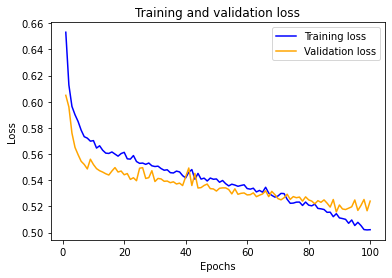

In [11]:
history_dict = history.history
# Learning curve(Loss)
# let's see the training and validation loss by epoch

# loss
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this

# range of X (no. of epochs)
epochs = range(1, len(loss_values) + 1) 

# plot
plt.plot(epochs, loss_values, 'blue', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

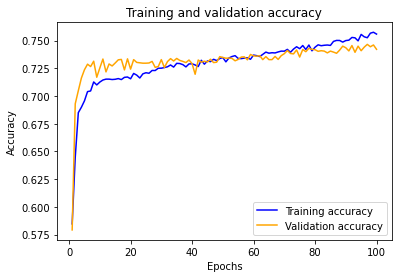

0.7465190887451172

In [17]:
# Learning curve(accuracy)
# let's see the training and validation accuracy by epoch

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'blue', label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# this is the max value - should correspond to
# the HIGHEST train accuracy
np.max(val_acc)

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
X_test = np.array(X_test)
x_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

# see how these are numbers between 0 and 1? 
regressor.predict(x_test) # prob of successes (survival)
np.round(regressor.predict(x_test),0) # 1 and 0 (survival or not)
Y # 1 and 0 (survival or X_test_fs)

# so we need to round to a whole number (0 or 1),
# or the confusion matrix won't work!
preds = np.round(regressor.predict(x_test),0)

# confusion matrix
print(confusion_matrix(y_test, preds)) # order matters! (actual, predicted)

## array([[490,  59],   ([[TN, FP],
##       [105, 235]])     [Fn, TP]])

print(classification_report(y_test, preds))

[[3117 1034]
 [ 744 2107]]
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      4151
           1       0.67      0.74      0.70      2851

    accuracy                           0.75      7002
   macro avg       0.74      0.74      0.74      7002
weighted avg       0.75      0.75      0.75      7002

